In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
import numpy as np
import pandas as pd
import cv2
import os
import time
from keras.applications import vgg16
from keras.layers import Dense, Activation, Flatten
from keras.layers import merge, Input
from keras.models import Model
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D,MaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.models import Sequential,load_model
from keras.utils import to_categorical
from tensorflow import keras
from keras.layers import InputLayer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


In [3]:
expres_code = ['ang','dis','fea','hap','sad','sur']
expressions = [ 0,   1,   2,   3,   4,   5]

In [4]:
data_path = '/content/drive/My Drive/dataset/voilajones_ck+/'
def read_data(dir_path):
    img_names = []
    img_data_list = []
    labels = []
    img_list = os.listdir(dir_path)
    for img in img_list:
        input_img = cv2.imread(dir_path + img)
        input_img=cv2.resize(input_img,(224,224))
        img_data_list.append(input_img)
        label = img[4:7]  # each name of image have 2 char for label from index 3-5
        labels.append(expres_code.index(label))
        img_names.append(img)
    img_data = np.array(img_data_list)
    print(img_data)
    return img_data, labels, img_names

X, Y, img_names = read_data(data_path)

[[[[ 99  99  99]
   [ 99  99  99]
   [ 99  99  99]
   ...
   [134 134 134]
   [134 134 134]
   [134 134 134]]

  [[ 99  99  99]
   [ 99  99  99]
   [ 99  99  99]
   ...
   [134 134 134]
   [134 134 134]
   [134 134 134]]

  [[ 99  99  99]
   [ 99  99  99]
   [100 100 100]
   ...
   [135 135 135]
   [135 135 135]
   [135 135 135]]

  ...

  [[ 15  15  15]
   [ 15  15  15]
   [ 15  15  15]
   ...
   [ 58  58  58]
   [ 57  57  57]
   [ 57  57  57]]

  [[ 13  13  13]
   [ 13  13  13]
   [ 14  14  14]
   ...
   [ 63  63  63]
   [ 62  62  62]
   [ 62  62  62]]

  [[ 13  13  13]
   [ 13  13  13]
   [ 14  14  14]
   ...
   [ 63  63  63]
   [ 62  62  62]
   [ 62  62  62]]]


 [[[ 69  69  69]
   [ 69  69  69]
   [ 68  68  68]
   ...
   [101 101 101]
   [101 101 101]
   [101 101 101]]

  [[ 69  69  69]
   [ 69  69  69]
   [ 68  68  68]
   ...
   [101 101 101]
   [101 101 101]
   [101 101 101]]

  [[ 69  69  69]
   [ 69  69  69]
   [ 68  68  68]
   ...
   [102 102 102]
   [102 102 102]
   [102 102

In [5]:
img_x=np.array(X)
img_x = img_x.astype('float32')
img_x = img_x/255
img_x

array([[[[0.3882353 , 0.3882353 , 0.3882353 ],
         [0.3882353 , 0.3882353 , 0.3882353 ],
         [0.3882353 , 0.3882353 , 0.3882353 ],
         ...,
         [0.5254902 , 0.5254902 , 0.5254902 ],
         [0.5254902 , 0.5254902 , 0.5254902 ],
         [0.5254902 , 0.5254902 , 0.5254902 ]],

        [[0.3882353 , 0.3882353 , 0.3882353 ],
         [0.3882353 , 0.3882353 , 0.3882353 ],
         [0.3882353 , 0.3882353 , 0.3882353 ],
         ...,
         [0.5254902 , 0.5254902 , 0.5254902 ],
         [0.5254902 , 0.5254902 , 0.5254902 ],
         [0.5254902 , 0.5254902 , 0.5254902 ]],

        [[0.3882353 , 0.3882353 , 0.3882353 ],
         [0.3882353 , 0.3882353 , 0.3882353 ],
         [0.39215687, 0.39215687, 0.39215687],
         ...,
         [0.5294118 , 0.5294118 , 0.5294118 ],
         [0.5294118 , 0.5294118 , 0.5294118 ],
         [0.5294118 , 0.5294118 , 0.5294118 ]],

        ...,

        [[0.05882353, 0.05882353, 0.05882353],
         [0.05882353, 0.05882353, 0.05882353]

In [6]:
img_x.shape

(926, 224, 224, 3)

In [7]:
labels=np.array(Y)
labels

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3,
       3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4,

In [8]:
input_shape=(224,224,3)
vgg = vgg16.VGG16(include_top=True, weights='imagenet')

out = Dense(6, activation='softmax', name='predictions')(vgg.layers[-2].output)
vgg_model = Model(vgg.input, out)

for layer in vgg_model.layers:
    if layer.name in ['predictions','fc1','fc2']:
        layer.trainable = True
    else:
        layer.trainable = False

pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

553467904/553467096 [==============================] - 11s 0us/step


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  del sys.path[0]


,Layer Type,Layer Name,Layer Trainable
0,<keras.engine.input_layer.InputLayer object at 0x7efbb9fb0208>,input_1,False
1,<keras.layers.convolutional.Conv2D object at 0x7efbb9fb0710>,block1_conv1,False
2,<keras.layers.convolutional.Conv2D object at 0x7efbb9fb0b38>,block1_conv2,False
3,<keras.layers.pooling.MaxPooling2D object at 0x7efbb9fb0d68>,block1_pool,False
4,<keras.layers.convolutional.Conv2D object at 0x7efbb9fb0cf8>,block2_conv1,False
5,<keras.layers.convolutional.Conv2D object at 0x7efbb9f58d30>,block2_conv2,False
6,<keras.layers.pooling.MaxPooling2D object at 0x7efbb9f6e8d0>,block2_pool,False
7,<keras.layers.convolutional.Conv2D object at 0x7efbb9f6e710>,block3_conv1,False
8,<keras.layers.convolutional.Conv2D object at 0x7efbb9f71400>,block3_conv2,False
9,<keras.layers.convolutional.Conv2D object at 0x7efbb9f71dd8>,block3_conv3,False


In [9]:
vgg_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [10]:
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(img_x, labels)

10

In [11]:
import matplotlib.pyplot as plt

def cnn_model(x_train,x_test,y_test,y_train):
    vgg = vgg16.VGG16(include_top=True, weights='imagenet')

    out = Dense(6, activation='softmax', name='predictions')(vgg.layers[-2].output)
    vgg_model = Model(vgg.input, out)

    for layer in vgg_model.layers:
      if layer.name in ['predictions','fc1','fc2']:
          layer.trainable = True
      else:
          layer.trainable = False
    model = Sequential()
    model.add(vgg_model)
    model.compile(Adam(lr=.001), loss='categorical_crossentropy', metrics=['accuracy']) 


    history=model.fit(x_train, y_train, epochs=15, batch_size=30,verbose=1)
    loss,acc = model.evaluate(x_test, y_test)
    y_prediction = model.predict_classes(x_test)
    y_test_original=np.argmax(y_test,axis=1)
    confusion=confusion_matrix(y_true=y_test_original, y_pred=y_prediction)
    print(history.history.keys())
    plt.plot(history.history['loss'])
    plt.title('model history')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['loss'], loc='upper left')
    plt.show()
    plt.plot(history.history['accuracy'])
    plt.title('model history')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['accuracy'], loc='upper left')
    plt.show()
    return acc,confusion

Epoch 1/15
833/833 [==============================] - 11s 13ms/step - loss: 6.0372 - accuracy: 0.3001
Epoch 2/15
833/833 [==============================] - 3s 4ms/step - loss: 0.9692 - accuracy: 0.6543
Epoch 3/15
833/833 [==============================] - 3s 4ms/step - loss: 0.4415 - accuracy: 0.8247
Epoch 4/15
833/833 [==============================] - 3s 4ms/step - loss: 0.1907 - accuracy: 0.9268
Epoch 5/15
833/833 [==============================] - 3s 4ms/step - loss: 0.1147 - accuracy: 0.9592
Epoch 6/15
833/833 [==============================] - 3s 4ms/step - loss: 0.0513 - accuracy: 0.9844
Epoch 7/15
833/833 [==============================] - 3s 4ms/step - loss: 0.0382 - accuracy: 0.9892
Epoch 8/15
833/833 [==============================] - 3s 4ms/step - loss: 0.0143 - accuracy: 0.9952
Epoch 9/15
833/833 [==============================] - 3s 4ms/step - loss: 0.0219 - accuracy: 0.9928
Epoch 10/15
833/833 [==============================] - 3s 4ms/step - loss: 0.1714 - accuracy: 0.95

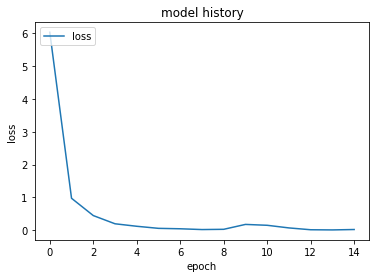

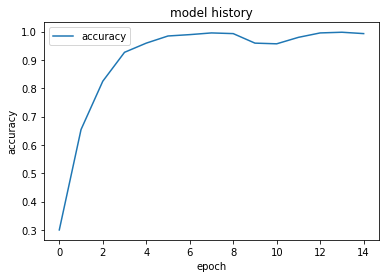

1.0
[[14  0  0  0  0  0]
 [ 0 18  0  0  0  0]
 [ 0  0  7  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  0 25]]
---------------------------------------------------------------------------
Epoch 1/15
833/833 [==============================] - 3s 4ms/step - loss: 5.5230 - accuracy: 0.2989
Epoch 2/15
833/833 [==============================] - 3s 4ms/step - loss: 0.8891 - accuracy: 0.6375
Epoch 3/15
833/833 [==============================] - 3s 4ms/step - loss: 0.3779 - accuracy: 0.8715
Epoch 4/15
833/833 [==============================] - 3s 4ms/step - loss: 0.1367 - accuracy: 0.9664
Epoch 5/15
833/833 [==============================] - 3s 4ms/step - loss: 0.0501 - accuracy: 0.9868
Epoch 6/15
833/833 [==============================] - 3s 4ms/step - loss: 0.0307 - accuracy: 0.9916
Epoch 7/15
833/833 [==============================] - 3s 4ms/step - loss: 0.0326 - accuracy: 0.9916
Epoch 8/15
833/833 [==============================] - 3s 4ms/step - loss: 0.1271 - accuracy: 

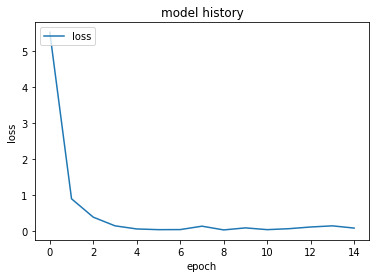

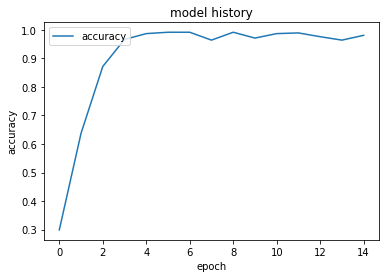

0.9032257795333862
[[11  0  0  0  3  0]
 [ 0 16  0  0  1  0]
 [ 0  0  3  1  2  2]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  0 25]]
---------------------------------------------------------------------------
Epoch 1/15
833/833 [==============================] - 3s 4ms/step - loss: 7.4959 - accuracy: 0.3625
Epoch 2/15
833/833 [==============================] - 3s 4ms/step - loss: 0.6352 - accuracy: 0.7623
Epoch 3/15
833/833 [==============================] - 3s 4ms/step - loss: 0.2236 - accuracy: 0.9100
Epoch 4/15
833/833 [==============================] - 3s 4ms/step - loss: 0.0858 - accuracy: 0.9664
Epoch 5/15
833/833 [==============================] - 3s 4ms/step - loss: 0.0754 - accuracy: 0.9784
Epoch 6/15
833/833 [==============================] - 3s 4ms/step - loss: 0.0422 - accuracy: 0.9880
Epoch 7/15
833/833 [==============================] - 3s 4ms/step - loss: 0.0414 - accuracy: 0.9844
Epoch 8/15
833/833 [==============================] - 3s 4ms/step - loss: 0.01

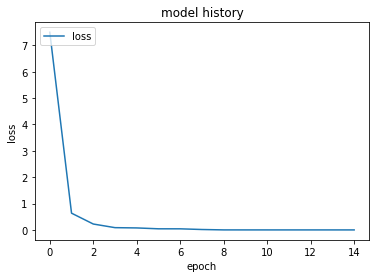

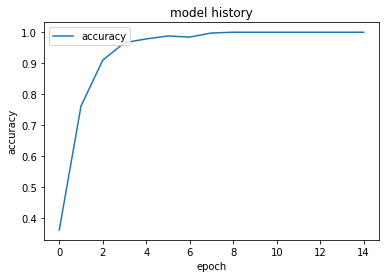

1.0
[[14  0  0  0  0  0]
 [ 0 17  0  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  0 25]]
---------------------------------------------------------------------------
Epoch 1/15
833/833 [==============================] - 3s 4ms/step - loss: 7.0076 - accuracy: 0.3541
Epoch 2/15
833/833 [==============================] - 3s 4ms/step - loss: 0.7080 - accuracy: 0.7299
Epoch 3/15
833/833 [==============================] - 3s 4ms/step - loss: 0.3270 - accuracy: 0.8715
Epoch 4/15
833/833 [==============================] - 3s 4ms/step - loss: 0.1540 - accuracy: 0.9412
Epoch 5/15
833/833 [==============================] - 3s 4ms/step - loss: 0.0392 - accuracy: 0.9856
Epoch 6/15
833/833 [==============================] - 3s 4ms/step - loss: 0.0447 - accuracy: 0.9856
Epoch 7/15
833/833 [==============================] - 3s 4ms/step - loss: 0.0772 - accuracy: 0.9760
Epoch 8/15
833/833 [==============================] - 3s 4ms/step - loss: 0.0754 - accuracy: 

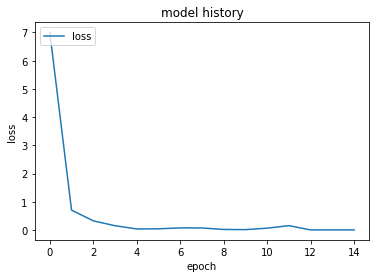

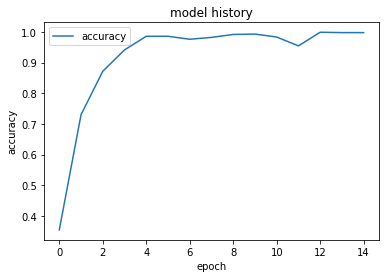

0.9677419066429138
[[14  0  0  0  0  0]
 [ 0 14  0  3  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  0 25]]
---------------------------------------------------------------------------
Epoch 1/15
833/833 [==============================] - 3s 4ms/step - loss: 7.0014 - accuracy: 0.4430
Epoch 2/15
833/833 [==============================] - 3s 4ms/step - loss: 0.4148 - accuracy: 0.8391
Epoch 3/15
833/833 [==============================] - 3s 4ms/step - loss: 0.1466 - accuracy: 0.9484
Epoch 4/15
833/833 [==============================] - 3s 4ms/step - loss: 0.0396 - accuracy: 0.9904
Epoch 5/15
833/833 [==============================] - 3s 4ms/step - loss: 0.0233 - accuracy: 0.9928
Epoch 6/15
833/833 [==============================] - 3s 4ms/step - loss: 0.0133 - accuracy: 0.9964
Epoch 7/15
833/833 [==============================] - 3s 4ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 8/15
833/833 [==============================] - 3s 4ms/step - loss: 3.95

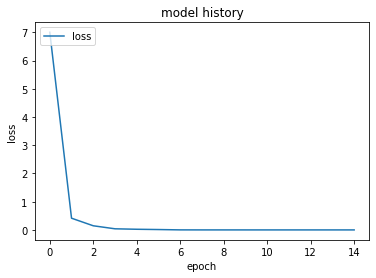

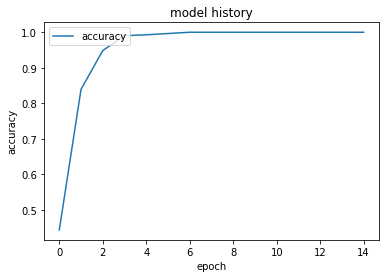

1.0
[[14  0  0  0  0  0]
 [ 0 18  0  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  0 24]]
---------------------------------------------------------------------------
Epoch 1/15
833/833 [==============================] - 3s 4ms/step - loss: 6.2734 - accuracy: 0.3613
Epoch 2/15
833/833 [==============================] - 3s 4ms/step - loss: 0.4945 - accuracy: 0.7947
Epoch 3/15
833/833 [==============================] - 3s 4ms/step - loss: 0.1874 - accuracy: 0.9292
Epoch 4/15
833/833 [==============================] - 3s 4ms/step - loss: 0.1828 - accuracy: 0.9460
Epoch 5/15
833/833 [==============================] - 3s 4ms/step - loss: 0.1433 - accuracy: 0.9556
Epoch 6/15
833/833 [==============================] - 3s 4ms/step - loss: 0.0576 - accuracy: 0.9820
Epoch 7/15
833/833 [==============================] - 3s 4ms/step - loss: 0.0318 - accuracy: 0.9892
Epoch 8/15
833/833 [==============================] - 3s 4ms/step - loss: 0.0058 - accuracy: 

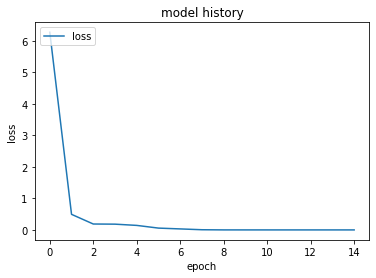

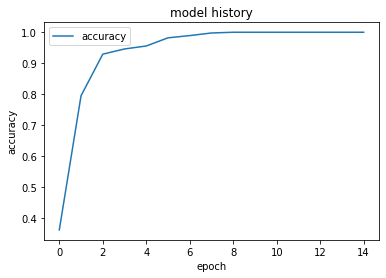

1.0
[[13  0  0  0  0  0]
 [ 0 18  0  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  0 25]]
---------------------------------------------------------------------------
Epoch 1/15
834/834 [==============================] - 4s 5ms/step - loss: 7.4546 - accuracy: 0.2962
Epoch 2/15
834/834 [==============================] - 3s 4ms/step - loss: 0.6854 - accuracy: 0.7470
Epoch 3/15
834/834 [==============================] - 3s 4ms/step - loss: 0.2162 - accuracy: 0.9257
Epoch 4/15
834/834 [==============================] - 3s 4ms/step - loss: 0.0585 - accuracy: 0.9808
Epoch 5/15
834/834 [==============================] - 3s 4ms/step - loss: 0.0380 - accuracy: 0.9868
Epoch 6/15
834/834 [==============================] - 3s 4ms/step - loss: 0.0484 - accuracy: 0.9820
Epoch 7/15
834/834 [==============================] - 3s 4ms/step - loss: 0.0199 - accuracy: 0.9940
Epoch 8/15
834/834 [==============================] - 3s 4ms/step - loss: 0.0952 - accuracy: 

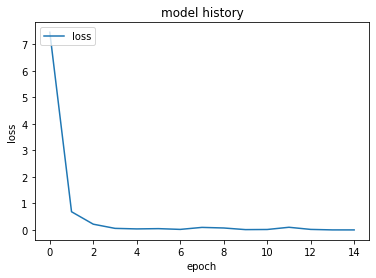

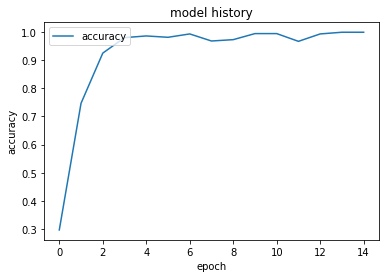

0.989130437374115
[[13  0  0  0  0  0]
 [ 0 18  0  0  0  0]
 [ 0  0  7  0  0  0]
 [ 0  0  0 21  0  0]
 [ 0  0  0  0  8  0]
 [ 0  0  0  0  1 24]]
---------------------------------------------------------------------------
Epoch 1/15
834/834 [==============================] - 3s 4ms/step - loss: 5.9903 - accuracy: 0.3261
Epoch 2/15
834/834 [==============================] - 3s 4ms/step - loss: 0.6560 - accuracy: 0.7542
Epoch 3/15
834/834 [==============================] - 3s 4ms/step - loss: 0.2140 - accuracy: 0.9149
Epoch 4/15
834/834 [==============================] - 3s 4ms/step - loss: 0.1211 - accuracy: 0.9496
Epoch 5/15
834/834 [==============================] - 3s 4ms/step - loss: 0.0792 - accuracy: 0.9688
Epoch 6/15
834/834 [==============================] - 3s 4ms/step - loss: 0.0631 - accuracy: 0.9796
Epoch 7/15
834/834 [==============================] - 3s 4ms/step - loss: 0.0296 - accuracy: 0.9868
Epoch 8/15
834/834 [==============================] - 3s 4ms/step - loss: 0.015

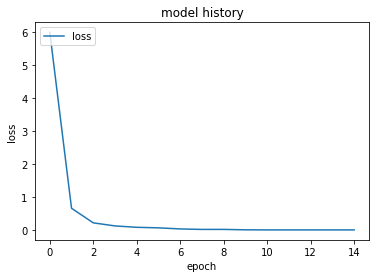

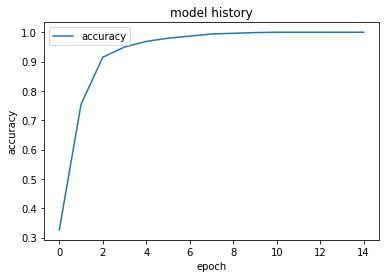

1.0
[[13  0  0  0  0  0]
 [ 0 18  0  0  0  0]
 [ 0  0  7  0  0  0]
 [ 0  0  0 20  0  0]
 [ 0  0  0  0  9  0]
 [ 0  0  0  0  0 25]]
---------------------------------------------------------------------------
Epoch 1/15
834/834 [==============================] - 3s 4ms/step - loss: 7.6007 - accuracy: 0.3921
Epoch 2/15
834/834 [==============================] - 3s 4ms/step - loss: 0.4958 - accuracy: 0.8106
Epoch 3/15
834/834 [==============================] - 3s 4ms/step - loss: 0.1666 - accuracy: 0.9412
Epoch 4/15
834/834 [==============================] - 3s 4ms/step - loss: 0.1261 - accuracy: 0.9568
Epoch 5/15
834/834 [==============================] - 3s 4ms/step - loss: 0.0779 - accuracy: 0.9796
Epoch 6/15
834/834 [==============================] - 3s 4ms/step - loss: 0.0531 - accuracy: 0.9880
Epoch 7/15
834/834 [==============================] - 3s 4ms/step - loss: 0.0435 - accuracy: 0.9808
Epoch 8/15
834/834 [==============================] - 3s 4ms/step - loss: 0.0135 - accuracy: 

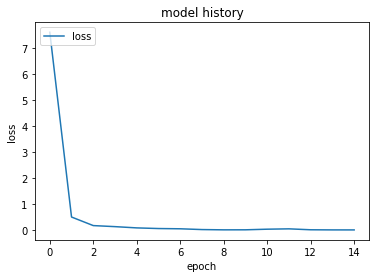

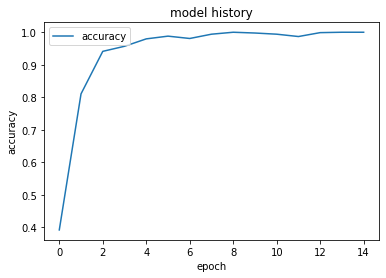

1.0
[[13  0  0  0  0  0]
 [ 0 18  0  0  0  0]
 [ 0  0  7  0  0  0]
 [ 0  0  0 20  0  0]
 [ 0  0  0  0  9  0]
 [ 0  0  0  0  0 25]]
---------------------------------------------------------------------------
Epoch 1/15
834/834 [==============================] - 3s 4ms/step - loss: 7.8010 - accuracy: 0.4269
Epoch 2/15
834/834 [==============================] - 3s 4ms/step - loss: 0.3884 - accuracy: 0.8465
Epoch 3/15
834/834 [==============================] - 3s 4ms/step - loss: 0.0854 - accuracy: 0.9784
Epoch 4/15
834/834 [==============================] - 3s 4ms/step - loss: 0.0543 - accuracy: 0.9808
Epoch 5/15
834/834 [==============================] - 3s 4ms/step - loss: 0.0291 - accuracy: 0.9904
Epoch 6/15
834/834 [==============================] - 3s 4ms/step - loss: 0.1298 - accuracy: 0.9640
Epoch 7/15
834/834 [==============================] - 3s 4ms/step - loss: 0.0487 - accuracy: 0.9844
Epoch 8/15
834/834 [==============================] - 4s 4ms/step - loss: 0.0485 - accuracy: 

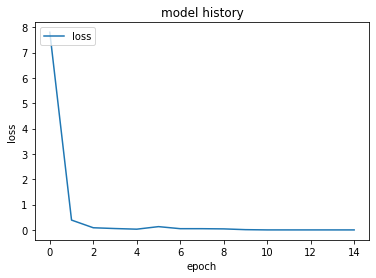

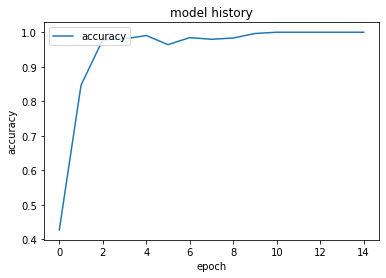

0.989130437374115
[[12  0  0  0  1  0]
 [ 0 18  0  0  0  0]
 [ 0  0  7  0  0  0]
 [ 0  0  0 20  0  0]
 [ 0  0  0  0  9  0]
 [ 0  0  0  0  0 25]]
---------------------------------------------------------------------------


In [12]:
prediction=[]
confusion_list=[]
num_classes = 6
for train_index, test_index in skf.split(img_x, labels):
    x_train, x_test = img_x[train_index,:,:,:], img_x[test_index,:,:,:]
    y_train, y_test = labels[train_index], labels[test_index]
    y_train =to_categorical(y_train, num_classes)
    y_test =to_categorical(y_test, num_classes)
    X,Y=cnn_model(x_train,x_test,y_test,y_train)
    prediction.append(X)
    confusion_list.append(Y)
    print(X)
    print(Y)
    print("---------------------------------------------------------------------------")